In [3]:
import pandas as pd
titanic = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

In [8]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


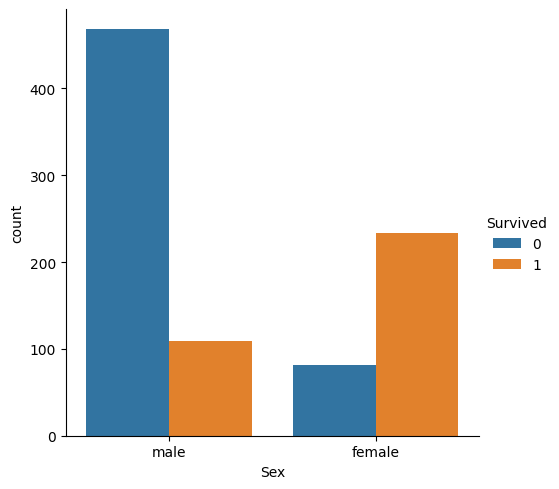

In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.catplot(x ="Sex" , hue ="Survived" , kind ="count", data = titanic)

<Axes: xlabel='Survived', ylabel='Pclass'>

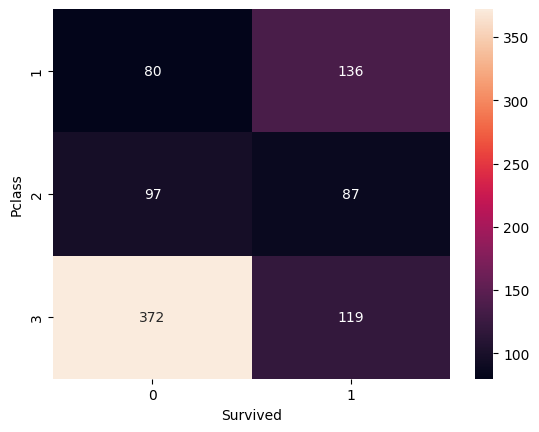

In [17]:
group = titanic.groupby(['Pclass','Survived'])
pclass_survived=group.size().unstack()
sns.heatmap(pclass_survived, annot = True, fmt="d")

<Axes: xlabel='Sex', ylabel='Age'>

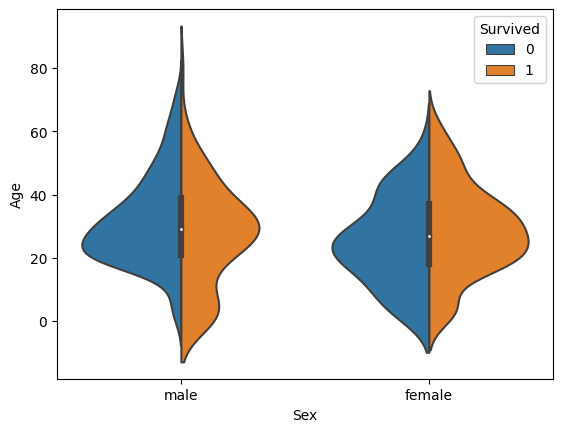

In [18]:
sns.violinplot(x ="Sex", y="Age", hue ="Survived", data = titanic, split= True)

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


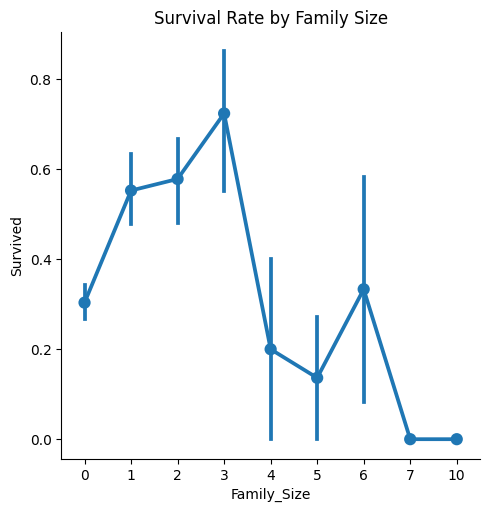

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


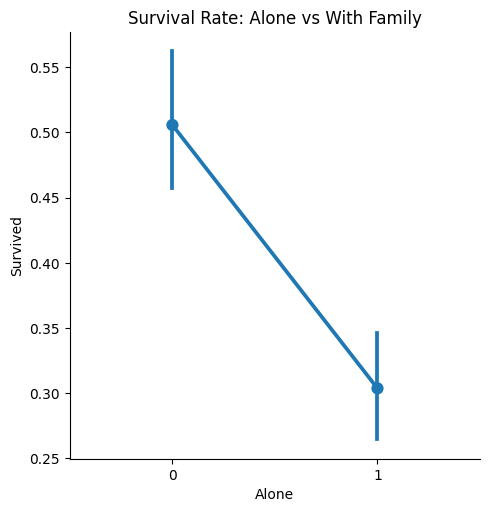

In [22]:
import seaborn as sns 
import matplotlib.pyplot as plt
titanic['Family_Size'] = titanic['Parch'] + titanic["SibSp"]
titanic['Alone'] = 0
titanic.loc[titanic['Family_Size'] == 0, 'Alone'] = 1
sns.catplot(x='Family_Size', y='Survived', data=titanic ,kind='point')
plt.title("Survival Rate by Family Size")
plt.show()
sns.catplot(x='Alone', y="Survived" , data=titanic, kind='point')
plt.title("Survival Rate: Alone vs With Family")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Fare_Range', ylabel='Survived'>

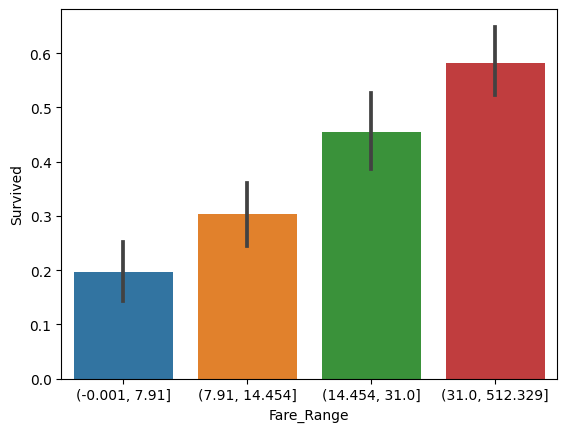

In [6]:
titanic['Fare_Range'] = pd.qcut(titanic['Fare'], 4)
sns.barplot(x ='Fare_Range', y ='Survived' ,data = titanic)

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


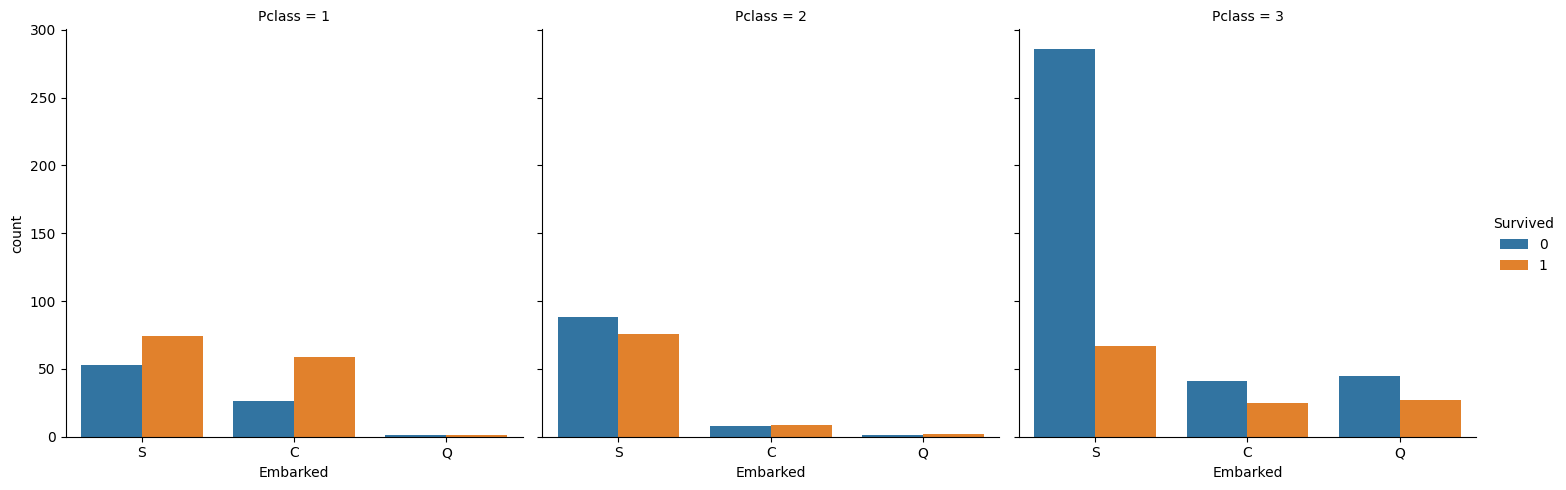

In [7]:
sns.catplot(x ='Embarked' , hue='Survived' , kind='count', col='Pclass', data=titanic)